In [1]:
library(dplyr)
library(ggplot2)
library(zoo)
library(lubridate)
library("RColorBrewer")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



**Import library: dplyr, tidyr, ggpplot2, zoo, lubridate and "RColorBrewer"**


a. dplyr --- to use the function mutate (), select (), filter (), summarise () or arrange (), to join also two datasets to find out the percentage of certain field compared to total volume of the dataset

b. ggplot2 -- to call out the plot

c. zoo -- to use yearmon function 

d. lubridate -- to change date data by using floor_date function, cleandate function which is followed by POSIXct (calender time), POSIXit(dmyhms version)

e. RColorBrewer -- to change color in plots using scale_fill_brewer(palette="X") function 


In [2]:
unlcrimes <- read.csv("Data/unlcrime-4.csv")

call out the data 

In [3]:
head (unlcrimes)

CaseNo,Incident.Code,Reported,Case.Status,Start.Occurred,End.Occurred,Building,Location,Stolen,Damaged,Description
11000001,NARCOTICS - POSSESSION,2011-01-01T00:10:00,Cleared by Arrest,2011-01-01T00:10:00,,515 N 19th Parking Lot Vine to,515 North 19th St. (GOV'T PARKING LOT (UNL)),NA,NA,UNL student cited and released for Poss of Marijuana < 1 oz and Poss of Drug Paraphernalia after a CSO reported suspicious drug-related activity from a vehicle. 1.2 g of marijuana seized.
11000011,NARCOTICS - POSSESSION,2011-01-01T23:16:00,Cleared by Arrest,2011-01-01T23:16:00,,,N 10TH ST & CHARLESTON ST (STREET),NA,NA,Traffic Stop. Vehicle stopped for a headlight out. Upon contact Officer smelled the strong odor of burnt marijuana. Driver cited/released for Possession of Drug Paraphernalia after a search yielded a pipe with burnt marijuana residue.
11000013,ALCOHOL - MINOR IN POSSESSION,2011-01-02T00:38:00,Cleared by Arrest,2011-01-02T00:38:00,,,N 17TH ST & N ANTELOPE VALLEY PKWY (STREET),NA,NA,Three persons cited for MIPC after being stopped for no headlights at N. Antelope valley parkway and N. 17rh Street.
11000019,TRAFFIC - SUSPENDED DRIVER,2011-01-02T23:24:00,Cleared by Arrest,2011-01-02T23:24:00,,,N 17TH ST & VINE ST (STREET),NA,NA,Non-student cited and lodged in jail for Driving Under Suspension after being stopped for speeding.
11000020,NARCOTICS - POSSESSION,2011-01-03T04:46:00,Cleared by Arrest,2011-01-03T04:46:00,,,N 10TH ST & CHARLESTON ST (STREET),NA,NA,"Non-student stopped for speeding. Officer smelled burnt marijuana from within the vehicle and upon searching located burnt marijuana cigarettes, a pipe, and .6 g of marijuana. Cited and released for Speeding, Poss of Marijuana < 1 oz, and Poss of Drug Paraphernalia."
11000022,MEDICAL EMERGENCY,2011-01-03T10:34:00,Inactive,2011-01-03T10:34:00,,Campus Recreation Center,841 North 14th St (SPORT FACILITIES),NA,NA,UNL affiliated female disoriented in need of medical attention at the Rec Center. Transported to the hospital by LFR.


Look at the overal dataset in R 

In [4]:
unlcrimes %>% mutate(
    CleanDate = as.POSIXct(Reported, format="%Y-%m-%dT%H:%M"),
)

CaseNo,Incident.Code,Reported,Case.Status,Start.Occurred,End.Occurred,Building,Location,Stolen,Damaged,Description,CleanDate
11000001,NARCOTICS - POSSESSION,2011-01-01T00:10:00,Cleared by Arrest,2011-01-01T00:10:00,,515 N 19th Parking Lot Vine to,515 North 19th St. (GOV'T PARKING LOT (UNL)),NA,NA,UNL student cited and released for Poss of Marijuana < 1 oz and Poss of Drug Paraphernalia after a CSO reported suspicious drug-related activity from a vehicle. 1.2 g of marijuana seized.,2011-01-01 00:10:00
11000011,NARCOTICS - POSSESSION,2011-01-01T23:16:00,Cleared by Arrest,2011-01-01T23:16:00,,,N 10TH ST & CHARLESTON ST (STREET),NA,NA,Traffic Stop. Vehicle stopped for a headlight out. Upon contact Officer smelled the strong odor of burnt marijuana. Driver cited/released for Possession of Drug Paraphernalia after a search yielded a pipe with burnt marijuana residue.,2011-01-01 23:16:00
11000013,ALCOHOL - MINOR IN POSSESSION,2011-01-02T00:38:00,Cleared by Arrest,2011-01-02T00:38:00,,,N 17TH ST & N ANTELOPE VALLEY PKWY (STREET),NA,NA,Three persons cited for MIPC after being stopped for no headlights at N. Antelope valley parkway and N. 17rh Street.,2011-01-02 00:38:00
11000019,TRAFFIC - SUSPENDED DRIVER,2011-01-02T23:24:00,Cleared by Arrest,2011-01-02T23:24:00,,,N 17TH ST & VINE ST (STREET),NA,NA,Non-student cited and lodged in jail for Driving Under Suspension after being stopped for speeding.,2011-01-02 23:24:00
11000020,NARCOTICS - POSSESSION,2011-01-03T04:46:00,Cleared by Arrest,2011-01-03T04:46:00,,,N 10TH ST & CHARLESTON ST (STREET),NA,NA,"Non-student stopped for speeding. Officer smelled burnt marijuana from within the vehicle and upon searching located burnt marijuana cigarettes, a pipe, and .6 g of marijuana. Cited and released for Speeding, Poss of Marijuana < 1 oz, and Poss of Drug Paraphernalia.",2011-01-03 04:46:00
11000022,MEDICAL EMERGENCY,2011-01-03T10:34:00,Inactive,2011-01-03T10:34:00,,Campus Recreation Center,841 North 14th St (SPORT FACILITIES),NA,NA,UNL affiliated female disoriented in need of medical attention at the Rec Center. Transported to the hospital by LFR.,2011-01-03 10:34:00
11000024,FRAUD - CREDIT CARDS/ATM/BANK CARD,2011-01-03T14:25:00,Inactive,2010-12-21T00:00:00,,,Cyberspace/Internet (INTERNET/CYBERSPACE),NA,NA,"Person received items they did not order on their credit card, unknown who may have used their card.",2011-01-03 14:25:00
11000027,FIRE (WORKING) - ALARM,2011-01-03T20:51:00,Cleared by Exception,2011-01-03T20:51:00,,Memorial Stadium,740 Stadium Dr. (SPORT FACILITIES),NA,NA,"Fire alarm at Memorial Stadium caused by broken water pipe, no damage at this time, LFR on scene.",2011-01-03 20:51:00
11000030,LARCENY - MOTOR VEH. ACCESSORIES,2011-01-04T10:57:00,Inactive,2010-12-03T17:00:00,2011-01-04T10:57:00,Hardin Hall,1600 North 33rd St (GOV'T PARKING LOT (UNL)),400,500,Theft of a catalytic converter from a state owned vehicle.,2011-01-04 10:57:00
11000032,DISTURBANCE - OTHER,2011-01-04T16:40:00,Inactive,,,Burnett Hall,1220 T St (UNL ACADEMIC BUILDING),NA,NA,Person received a letter from another person which disturbed them.,2011-01-04 16:40:00


Clean the data since it contains irregular form of data: 2011-01-01T00:10:00. We already imported the lubridate, now we can use: as.POSIXct(Reported, format="%Y-%m-%dT%H:%M")

unlcrimesbymonth <- unlcrimes %>% mutate(
    shortdate = format(as.POSIXct(Reported, format="%Y-%m-%d")),
    month = floor_date(ymd(shortdate), "month"),
    sortedincident=ifelse(Incident.Code == "NARCOTICS - POSSESSION"| Incident.Code == "ALCOHOL - MINOR IN POSSESSION", "Possession", "Other"),
) %>% group_by(sortedincident, month) %>% summarize(
    count = n()
    )
head(unlcrimesbymonth)

since we want to figure out the data per month, then we need to do:
1. use the format (as.POSIXct(Reported, format ="%Y-%m-%d"))
2. use the floor_date function to call out only the month. first create a field name: month and populate it with the floor date of the formatted Date column in "%Y -%m - %d" but slicing it by month only. 

* Next, because we want to choose only two reported crimes: narcotics - possesion and alcohol - minor in possession in all the UNLPD reported crimes, then we can use the ifelse function 

as in:

category = ifelse (This == "That" | This == "Them", "Whatever you want")
           ifelse (Other == "Thing" | Other == "Foo", "The Other Thing you want", "The options when neither of these things are true")
           
* so we fill it with:

sortedincident = ifelse (Incident.Code == "NARCOTICS - POSSESSION" | Incident. Code == "ALCOHOL - MINOR IN POSSESSION", "Possession", "Other"),


* after that we group by and calling the name of variable in the ifelse function as follow:

%>% group_by (sortedincident, month) %>% summarize 


* and count it!

Last, call out the dataset!

In [6]:
sapply(unlcrimesbymonth, class)

sortedincident          month          count 
   "character"         "Date"      "integer"

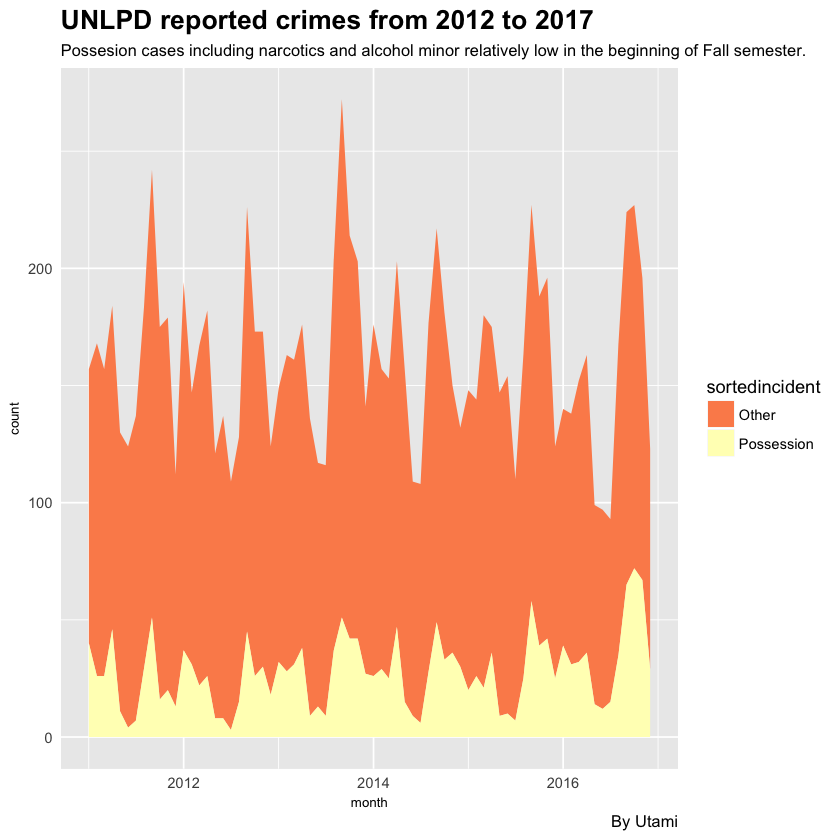

In [9]:
ggplot(unlcrimesbymonth, aes(x=month, y=count, fill=sortedincident)) + geom_area()+ scale_fill_brewer(palette="Spectral") +
  labs(x="month", y="count", title="UNLPD reported crimes from 2012 to 2017", subtitle="Possesion cases including narcotics and alcohol minor relatively low in the beginning of Fall semester.", caption="By Utami") +
theme(plot.title = element_text(size = 16, face = "bold"), axis.title = element_text(size = 8), axis.ticks=element_blank())

**Call out the ggplot and do some minor revision as follow:**
**1. ggplot(unlcrimesbymonth, aes(x=month, y=count, fill=sortedincident)) + geom_area()+ scale_fill_brewer(palette="Spectral")**

note:
* ggplot to call out the plot
* aes to write the title in x and y axis, x=month and y=count, fill (title of the legend) = sorted incident
* geom_area () to call out the area plot

**2. Rewrite the title, subtitle, write the byline, as follow:**

labs(x="month", y="count", title="UNLPD reported crimes from 2012 to 2017", subtitle="Possesion cases including narcotics and alcohol minor relatively low in the beginning of Fall semester.", caption="By Utami") 

**3. Revise the size of the title and subtitle as well as erasing the annoying ticks on the plot, as follow:**

theme(plot.title = element_text(size = 16, face = "bold"), axis.title = element_text(size = 8), axis.ticks=element_blank())

**POSSESSION CASES COMPARED TO UNLPD TOTAL REPORTED CRIMES FROM 2012 TO 2017**

In [10]:
monthtotals <- unlcrimes %>% mutate(
    shortdate = format(as.POSIXct(Reported, format="%Y-%m-%d")),
    month = floor_date(ymd(shortdate), "month"),
    sortedincident=ifelse(Incident.Code == "NARCOTICS - POSSESSION"| Incident.Code == "ALCOHOL - MINOR IN POSSESSION", "Possession", "Other"),
) %>% group_by(month) %>% summarize(
    count = n()
    )
percents <- unlcrimesbymonth %>% 
    inner_join(monthtotals, by="month") %>%
    mutate(percentage = (count.x/count.y)*100)

To find the percentage of possession cases compared to the UNLPD total reported crimes from 2012 to 2017, we need to do some steps:

**1. merge two data sets by creating a field called monthtotals and use mutate fuction**

Use the same function with the individual cases volume, which is:
shortdate = format(as.POSIXct(Reported, format="%Y-%m-%d")),
    month = floor_date(ymd(shortdate), "month"),
    sortedincident=ifelse(Incident.Code == "NARCOTICS - POSSESSION"| Incident.Code == "ALCOHOL - MINOR IN POSSESSION", "Possession", "Other"),
) %>% group_by(month) %>% summarize(
    count = n()
    )
    
**2. calculate the percentage and joining the datasets**

percents <- unlcrimesbymonth %>% 
    inner_join(monthtotals, by="month") %>%
    mutate(percentage = (count.x/count.y)*100)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


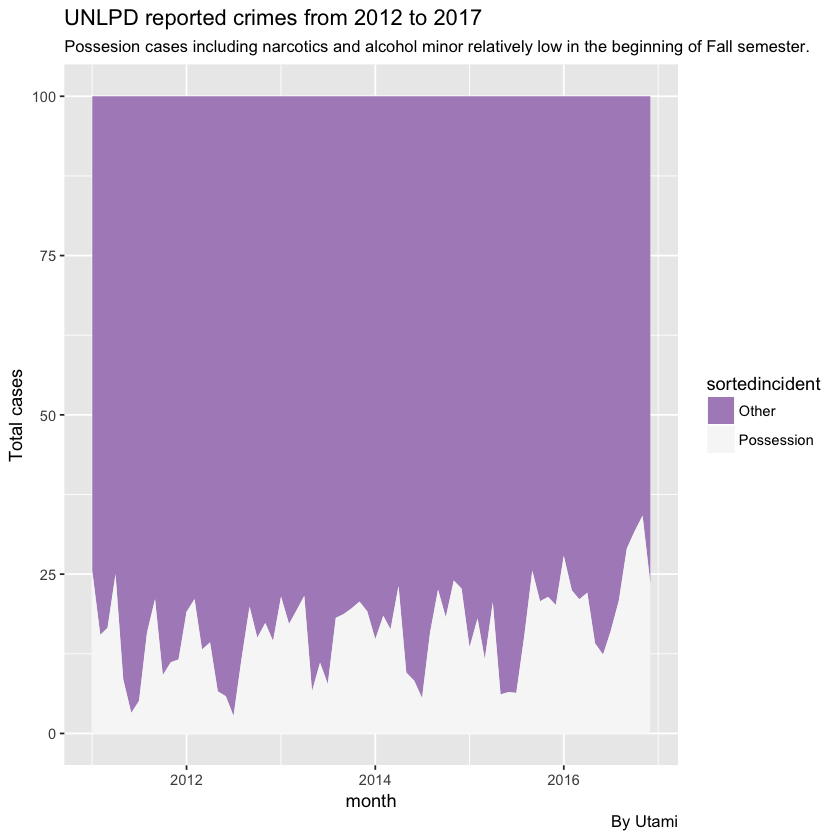

In [11]:
ggplot(percents, aes(x=month, y=percentage, fill=sortedincident)) +
    geom_area() + scale_fill_discrete(name="Type of crimes") + 
    scale_fill_brewer(palette="PRGn") +
    labs(x="month", y="Total cases", title="UNLPD reported crimes from 2012 to 2017", subtitle="Possesion cases including narcotics and alcohol minor relatively low in the beginning of Fall semester.", caption="By Utami")

Call out the area plot and do some revision in title, subtitle, byline

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


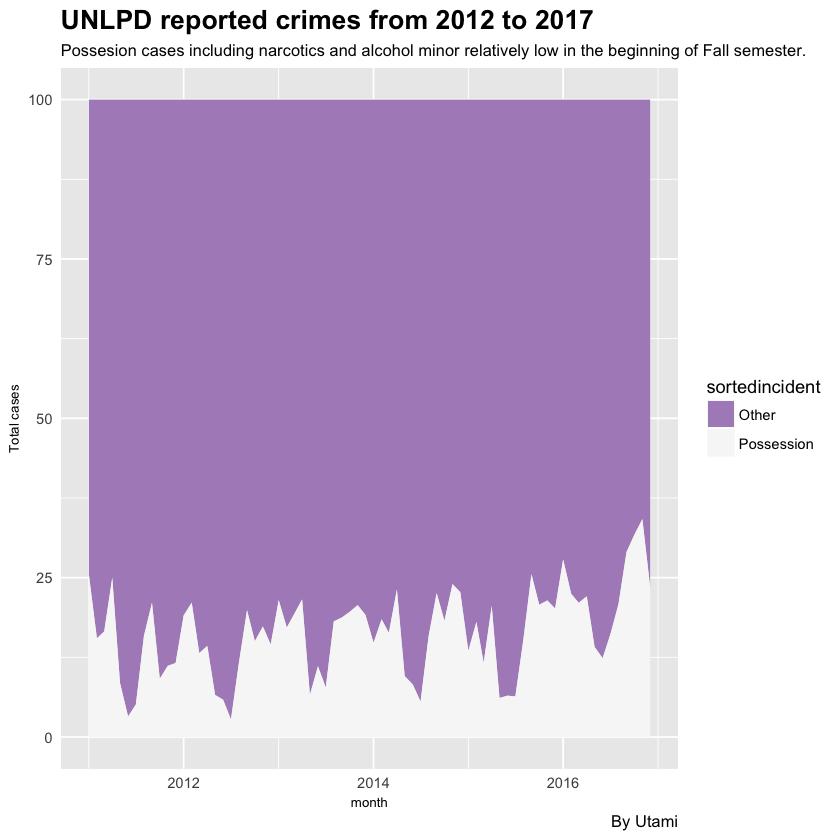

In [12]:
ggplot(percents, aes(x=month, y=percentage, fill=sortedincident)) +
    geom_area() + scale_fill_discrete(name="Type of crimes") + 
    scale_fill_brewer(palette="PRGn") +
    labs(x="month", y="Total cases", title="UNLPD reported crimes from 2012 to 2017", subtitle="Possesion cases including narcotics and alcohol minor relatively low in the beginning of Fall semester.", caption="By Utami") +
    theme(plot.title = element_text(size = 16, face = "bold"), axis.title = element_text(size = 8), axis.ticks=element_blank())

**Adding little detail that matter:**
1. erasing ticks 
2. resizing fonts 
3. resizing x and y axis
4. editing title, subtitle